In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import math

In [3]:
train_data = np.loadtxt("./data/zip.train")
test_data = np.loadtxt("./data/zip.test")

In [4]:
x_train, x_test, y_train, y_test = train_data[:,1:], test_data[:, 1:], train_data[:,0], test_data[:,0]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7291, 256) (2007, 256) (7291,) (2007,)


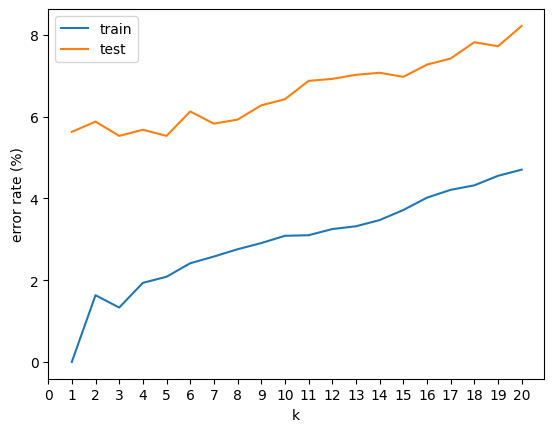

In [5]:
train_error, test_error = [], []
K = 21

for k in range(1, K):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)

    train_error.append(100 - knn.score(x_train, y_train)*100)
    test_error.append(100 - knn.score(x_test, y_test)*100)
    
x = np.arange(1,K)

fig, ax = plt.subplots()

ax.plot(x, train_error, label="train")
ax.plot(x, test_error, label="test")

ax.set_xlabel('k')
ax.set_ylabel('error rate (%)')

ax.set_xticks(np.arange(0, K, 1))
ax.legend()

plt.show()

In [6]:
train_data = train_data[np.isin(train_data[:,0], [2,3])]
test_data = test_data[np.isin(test_data[:,0], [2,3])]

In [7]:
x_train, x_test, y_train, y_test = train_data[:,1:], test_data[:, 1:], train_data[:,0], test_data[:,0]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1389, 256) (364, 256) (1389,) (364,)


In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

predict_train = model.predict(x_train) < 2.5
predict_test = model.predict(x_test) < 2.5

y_train_bool = y_train < 2.5
y_test_bool = y_test < 2.5

train_error = np.mean(predict_train != y_train_bool) * 100
test_error = np.mean(predict_test != y_test_bool) * 100

print(train_error)
print(test_error)

0.5759539236861051
4.1208791208791204


In [9]:
# parameters without using the inbuilt Linear Regression

unit = np.ones(x_train.shape[0])
x_train = np.insert(x_train, 0, unit, axis=1)

In [11]:
model.coef_

array([-2.88861437e-01,  5.93022626e-02,  2.40565969e-02, -2.64356805e-02,
        1.16775415e-02,  3.74923660e-03, -3.79483192e-03, -3.58438231e-03,
       -1.36610358e-02,  2.42559422e-02, -5.71717440e-02,  7.69621164e-02,
       -9.82394663e-03,  1.73586415e-01, -2.10862950e-01,  2.12482973e+01,
       -5.65358597e-02, -5.52421959e-02,  9.90591256e-03, -3.08468051e-03,
        3.68977893e-03, -1.20769789e-02,  5.07032401e-02, -3.08258960e-02,
       -1.08705270e-02, -1.53272874e-04,  4.24856619e-02,  3.74454934e-02,
       -2.43014712e-02, -7.05475222e-03, -3.00281362e-01,  8.52516002e-01,
       -1.07893201e-02, -2.29830021e-02,  2.88215942e-02,  1.02645629e-02,
       -4.10299809e-02,  8.16360126e-03,  1.56134600e-03, -2.09752763e-03,
        1.84995187e-02,  4.56621375e-03,  1.44598363e-03, -2.67258325e-02,
       -1.84425240e-02, -4.64405386e-02,  8.35415899e-02,  7.16212523e-02,
       -1.41997042e-02, -2.60343856e-02,  1.75116661e-02, -1.89609324e-02,
        1.51404964e-02,  

In [12]:
coef = (np.linalg.inv(x_train.T @ x_train)) @ (x_train.T @ y_train)

In [15]:
coef

array([ 2.35858443e+01, -2.88861439e-01,  5.93022638e-02,  2.40565965e-02,
       -2.64356806e-02,  1.16775416e-02,  3.74923659e-03, -3.79483194e-03,
       -3.58438232e-03, -1.36610357e-02,  2.42559421e-02, -5.71717438e-02,
        7.69621162e-02, -9.82394749e-03,  1.73586421e-01, -2.10862954e-01,
        2.12482987e+01, -5.65358597e-02, -5.52421959e-02,  9.90591268e-03,
       -3.08468047e-03,  3.68977890e-03, -1.20769788e-02,  5.07032401e-02,
       -3.08258960e-02, -1.08705269e-02, -1.53272922e-04,  4.24856619e-02,
        3.74454933e-02, -2.43014708e-02, -7.05475327e-03, -3.00281364e-01,
        8.52516002e-01, -1.07893199e-02, -2.29830022e-02,  2.88215940e-02,
        1.02645630e-02, -4.10299809e-02,  8.16360122e-03,  1.56134602e-03,
       -2.09752762e-03,  1.84995187e-02,  4.56621378e-03,  1.44598370e-03,
       -2.67258325e-02, -1.84425241e-02, -4.64405386e-02,  8.35415916e-02,
        7.16212539e-02, -1.41997042e-02, -2.60343857e-02,  1.75116661e-02,
       -1.89609324e-02,  

In [22]:
print(np.isclose(coef[1:], model.coef_, atol=1e-6))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T